In [1]:
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
def plot_images(images, n_images):
    _, h, w, d = images.shape
    # create an array that will store the images to plot.
    canvas = np.empty((h * n_images, w * n_images, d), dtype='uint8')

    for i in range(n_images):
        img_column = images[i * n_images:(i + 1) * n_images]
        for j in range(n_images):
            if j >= img_column.shape[0]:
                break

            # transform images to the range [0, 255]
            img = img_column[j]
            img = ((img * 127.5) + 127.5).clip(0, 255).astype('uint8')            
            canvas[i * h:(i + 1) * h, j * w:(j + 1) * w] = img

    plt.figure(figsize=(2 * n_images, 2 * n_images))
    plt.axis('off')
    cmap = 'gray' if d == 1 else None
    plt.imshow(canvas.squeeze(), origin="upper", cmap=cmap)
    plt.show()

In [9]:
with open('places365_challenge_test_data.pkl', 'rb') as file:
    (mu_entropy, error, voted_pred, sampling_entropy_gal) = pickle.load(file)

ValueError: not enough values to unpack (expected 4, got 3)

In [8]:
x

array([[1.4890915e-08, 4.4707587e-08, 2.5953170e-07, ..., 5.3995373e-06,
        2.9471559e-08, 2.0167430e-05],
       [8.2100591e-08, 7.5805438e-05, 3.3945237e-06, ..., 4.1218789e-07,
        3.0723419e-05, 8.2122170e-07],
       [2.6685234e-06, 4.4351516e-08, 4.4964088e-07, ..., 8.0149475e-06,
        1.4331229e-07, 3.7435232e-08],
       ...,
       [4.3095795e-08, 1.9573060e-08, 2.9018235e-08, ..., 5.0108735e-03,
        9.7827649e-07, 5.9741567e-05],
       [9.9249504e-05, 3.0211908e-07, 5.2364942e-07, ..., 4.9378281e-04,
        2.8611015e-07, 1.0261744e-04],
       [5.5779203e-08, 4.4480366e-09, 1.1191560e-08, ..., 1.6675918e-08,
        1.1437021e-09, 9.2112962e-10]], dtype=float32)

In [5]:
plt.figure(figsize=(15, 15))
plt.plot(np.cumsum(error[np.argsort(mu_entropy)]),'o', alpha=0.1, label='mu entropy')
plt.plot(np.cumsum(error[np.argsort(voted_pred)]),'o', alpha=0.1, label='voting')
plt.plot(np.cumsum(error[np.argsort(sampling_entropy_gal)]),'o', alpha=0.1, label='sampling entropy gal')
#plt.plot(np.cumsum(error[np.argsort(new)]),'o', alpha=0.1, label='new')
plt.legend()

NameError: name 'error' is not defined

<Figure size 1080x1080 with 0 Axes>

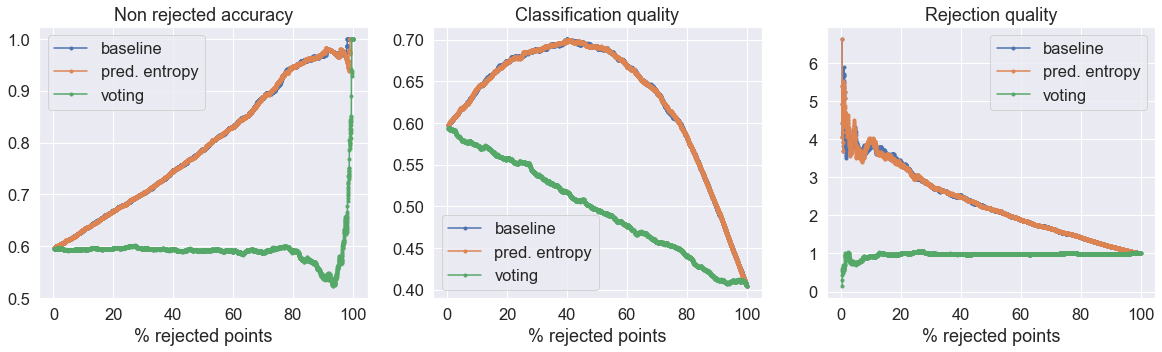

In [15]:
def plot_rejection_measures(rejection_measures, rejection_measures_baseline, rejection_measures_voting):
    metrics = ['Non rejected accuracy', 'Classification quality', 'Rejection quality']
    sns.set()
    sns.set(font_scale=1.5)
    plt.figure(figsize=(20,5))
    
    for i in range(0, 3):
        plt.subplot(1,3,i+1)
        plt.plot(rejection_measures_baseline[:,3], rejection_measures_baseline[:,i], label='baseline', marker="o", markersize=3)
        plt.plot(rejection_measures[:,3], rejection_measures[:,i], label='pred. entropy', marker="o", markersize=3)
        plt.plot(rejection_measures_voting[:,3], rejection_measures_voting[:,i], label='voting', marker="o", markersize=3)
        plt.xlabel('% rejected points')
        plt.title(metrics[i])
        plt.xscale('linear')
        plt.ylim()
        plt.legend()
plot_rejection_measures(rejection_measures, rejection_measures_baseline, rejection_measures_voting)

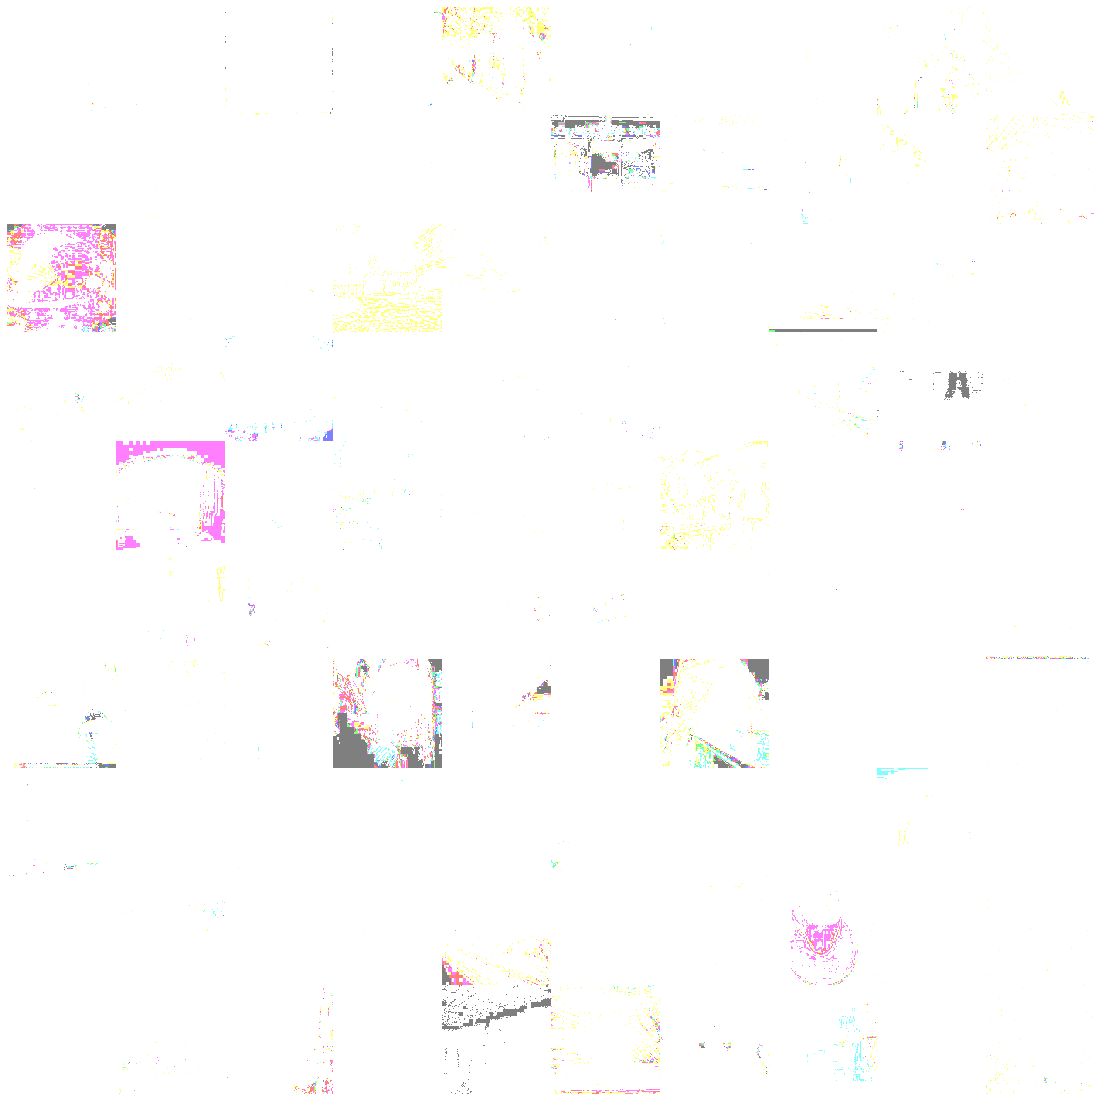

In [8]:
plot_images(x_test[np.argsort(sampling_entropy_gal)][::-1][:1000],10)

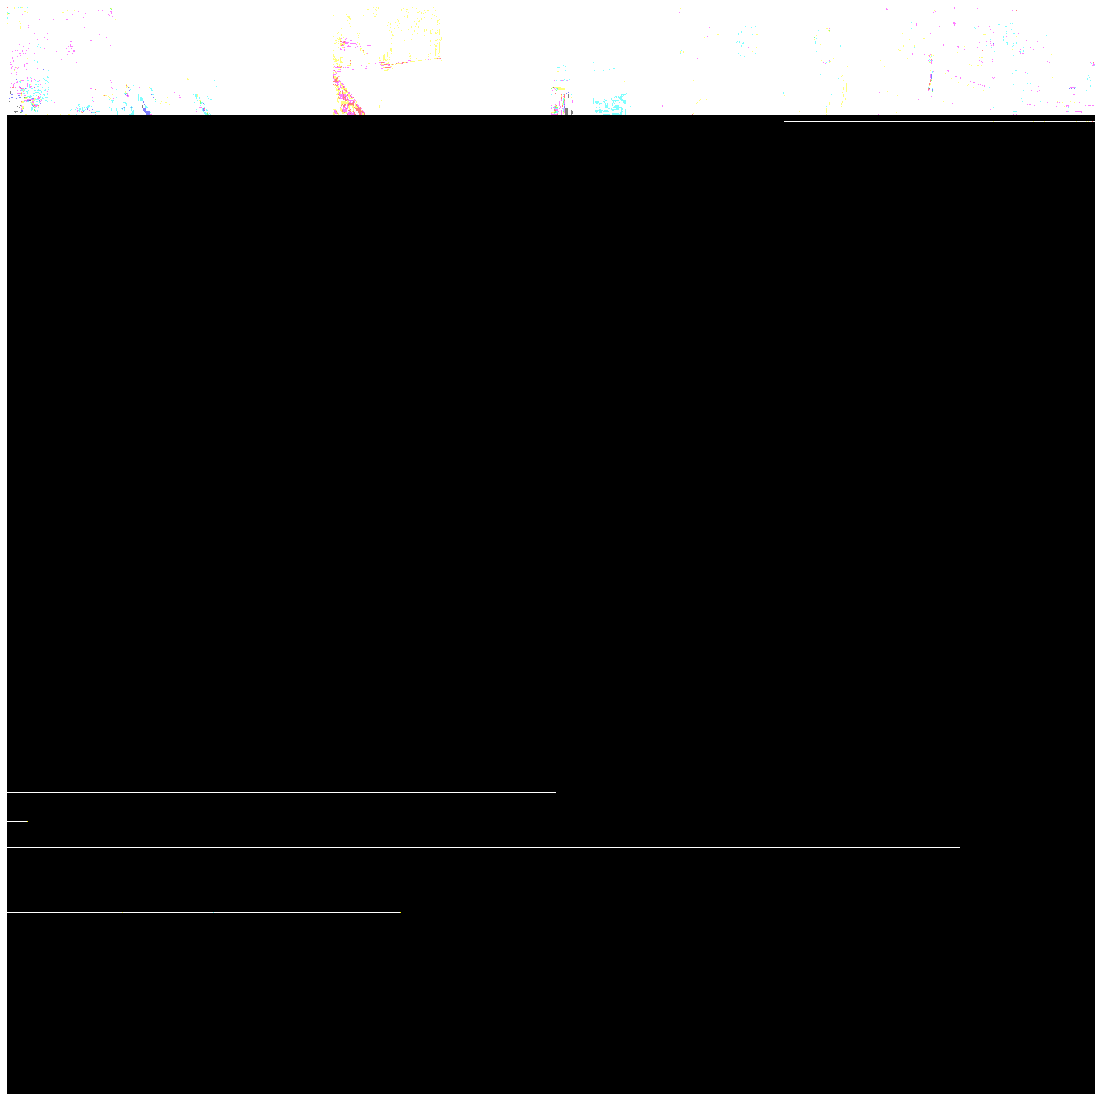

In [17]:
plot_images(x_test[y_test == 6],10)

In [19]:
np.sum(y_test[np.argsort(sampling_entropy_gal)][::-1][:1000] == 6)

5

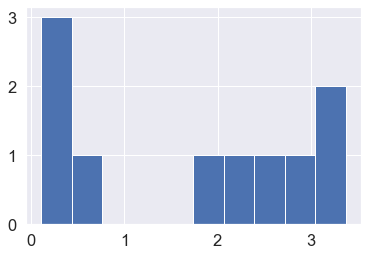

In [20]:
plt.hist(sampling_entropy_gal[y_test == 6]);

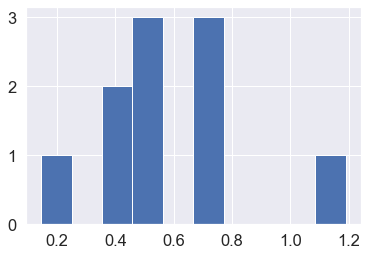

In [21]:
plt.hist(sampling_entropy_gal[y_test == 0]);